<div align="center">

# Выбор значимых признаков

</div>

---

Если вы заметили, что **модель работает значительно лучше на обучающем наборе**, чем на тестовом, это **явный признак переобучения**.

**Переобучение** означает, что модель **слишком точно подстроилась под конкретные примеры обучающего набора**, но **плохо обобщает новые данные**. В этом случае говорят, что **модель имеет высокую дисперсию**.

Причина переобучения — **слишком высокая сложность модели** относительно объема и структуры обучающих данных.

### Распространённые способы борьбы с переобучением:

* **Собрать больше обучающих данных** (часто невозможно);
* **Ввести штраф за сложность** — через **регуляризацию**;
* **Выбрать более простую модель** с меньшим числом параметров;
* **Уменьшить размерность данных**.

---

## Регуляризация L1 и L2, как штраф за сложность модели


**Регуляризация** — это один из способов **снижения сложности модели** путём введения **штрафа за большие веса**, что помогает бороться с переобучением.

---

### 🔹 Регуляризация **L2** (ридж-регуляризация)

#### 📌 Суть метода:

* **Основана на штрафе за квадрат нормы весов**:

  $$
  \|\mathbf{w}\|_2^2 = \sum_{j=1}^{m} w_j^2
  $$
* **Назначение**: уменьшает значения весов, делая модель **менее подверженной переобучению**.
* **Веса не обнуляются полностью**, а лишь становятся менее экстремальными.
* **Все признаки сохраняются**, но влияние нерелевантных — снижается.

#### 🔹 Геометрический смысл регуляризации **L2**

* **Регуляризация L2** добавляет штрафной член к функции потерь:

  $$
  J(w) = \text{Loss}(w) + \lambda \|\mathbf{w}\|_2^2
  $$

* Это соответствует **ограничению на длину вектора весов**: веса должны оставаться **внутри L2-нормы**.

* **Параметр регуляризации** $\lambda$:

  * Определяет **жёсткость ограничения**.
  * При $\lambda \to \infty$ веса стремятся к нулю.

### 📉 Эффекты L2-регуляризации:

* **Смягчает** значения весов.
* **Снижает дисперсию** модели.
* **Предотвращает переобучение**.
* **Повышает обобщающую способность**, особенно при недостатке данных.

---

### 🔸 Регуляризация **L1** (лассо-регуляризация):

#### 📌 Что такое разреженные векторы признаков?

**Разреженный вектор признаков** — это вектор, в котором **большинство элементов равны нулю**, и только **немногие — ненулевые**. Такой вектор эффективно кодирует информацию, отбрасывая нерелевантные или слабозначимые признаки.

### 🔸 Почему регуляризация **L1** приводит к разреженности?

Регуляризация **L1** минимизирует сумму **абсолютных значений весов**:

$$
\| \mathbf{w} \|_1 = \sum_{j=1}^m |w_j|
$$

В отличие от L2, L1 создаёт **угловую геометрию ограничений**, которая **способствует занулению отдельных весов** при оптимизации.

👉 В результате оптимальное решение часто содержит **много нулевых весов** — это и есть **разреженность**.

### Почему это полезно:

* Отбрасываются **нерелевантные признаки**.
* Модель становится **интерпретируемой и устойчивой**.
* Особенно эффективно при **высокой размерности** и **ограниченном объёме данных**.

Таким образом, **L1-регуляризация выполняет ещё и роль отбора признаков**.

---

Использование L1-регуляризации в данном примере заключается в установке параметра `penalty='l1'`, что позволяет получить разреженное решение.

При этом необходимо выбрать другой алгоритм оптимизации, например `solver='liblinear'`, поскольку `lbfgs` не поддерживает оптимизацию функции потерь с L1-регуляризацией.

Алгоритмы оптимизации (`solvers`) в `scikit-learn` представляют собой методы численного минимизирования функции потерь:

* **`liblinear`** — основан на библиотеке *LIBLINEAR*, применяет метод координатного спуска, хорошо работает для небольших задач и поддерживает L1 и L2-регуляризацию.
* **`lbfgs`** — разновидность квазиньютоновского метода (*Limited-memory BFGS*), эффективен для больших задач, но **не поддерживает L1-регуляризацию**.
* **`saga`** — стохастический градиентный метод, поддерживает как L1, так и L2-регуляризацию, подходит для разреженных данных и больших выборок.
* **`newton-cg`** и **`sag`** — другие варианты оптимизации, не поддерживают L1-регуляризацию.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Загрузка датасета Wine из репозитория UCI в DataFrame без заголовков
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header=None)

# Назначение имен столбцам для лучшей читаемости и удобства
df_wine.columns = ['Class label',        # Класс вина (1, 2 или 3)
                   'Alcohol',            # Содержание алкоголя
                   'Malic acid',         # Яблочная кислота
                   'Ash',                # Зольность
                   'Alcalinity of ash',  # Щелочность золы
                   'Magnesium',          # Магний
                   'Total phenols',      # Общее количество фенолов
                   'Flavanoids',         # Флавоноиды
                   'Nonflavanoid phenols',       # Нефлавоноидные фенолы
                   'Proanthocyanins',             # Проантоцианы
                   'Color intensity',             # Интенсивность цвета
                   'Hue',                         # Оттенок
                   'OD280/OD315 of diluted wines',# Показатель OD280/OD315
                   'Proline']   


In [90]:
#Разделение данных на обучающие и тестовые выборки
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     random_state = 0,
                     stratify = y)

# Процедура стандартизации
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [91]:
# Обучение модели
lr = OneVsRestClassifier(LogisticRegression(penalty='l1',
                                             C=1.0,
                                             solver='liblinear'))
# Значение C=1.0 по умолчанию
# Можно увеличить или уменьшить его, чтобы сделать эффект регуляризации
# сильнее или слабее

lr.fit(X_train_std, y_train)

print('Точность при обучении: ', lr.score(X_train_std, y_train))
print('Точность при тестировании: ', lr.score(X_test_std, y_test))
# Смещения
for i, estimator in enumerate(lr.estimators_):
    print(f"Класс {i}: intercept = {estimator.intercept_}")

Точность при обучении:  1.0
Точность при тестировании:  1.0
Класс 0: intercept = [-1.26338744]
Класс 1: intercept = [-1.21620675]
Класс 2: intercept = [-2.37069897]


После обучения многоклассовой логистической регрессии с использованием подхода **One-vs-Rest (OvR)**, модель показывает **100 % точность** как на обучающем, так и на тестовом наборе данных, что указывает на её высокую эффективность.

При обращении к атрибуту `intercept_` объекта `LogisticRegression`, возвращается массив из трёх значений — по одному для каждой бинарной модели:

* Первое значение соответствует смещению (**intercept**) модели для **класса 0** против **классов 1 и 2**.
* Второе — для **класса 1** против **классов 0 и 2**.
* Третье — для **класса 2** против **классов 0 и 1**.

Пример:

* Класс 0: `intercept = [-1.26296299]`
* Класс 1: `intercept = [-1.21587989]`
* Класс 2: `intercept = [-2.37000006]`

Эти значения отражают **смещения** (bias) соответствующих логистических моделей.

In [92]:
coef_matrix = np.vstack([est.coef_ for est in lr.estimators_])
print(coef_matrix)

[[ 1.24573774  0.18071959  0.74378825 -1.16155595  0.          0.
   1.16941609  0.          0.          0.          0.          0.54796499
   2.51038427]
 [-1.53663694 -0.38729056 -0.99504854  0.36482432 -0.05942032  0.
   0.66840025  0.          0.         -1.93484729  1.23294232  0.
  -2.23198642]
 [ 0.1355616   0.16927997  0.35762932  0.          0.          0.
  -2.43464521  0.          0.          1.56277705 -0.81732005 -0.49644658
   0.        ]]


Массив весов, доступный через атрибут `lr.coef_`, содержит **по одному вектору весов на каждый класс**. Каждая строка содержит **13 весов** — по числу признаков в наборе данных, которые участвуют в вычислении линейной комбинации $z = \mathbf{w}^\top \mathbf{x} + b$.

Использованная **L1-регуляризация** выполняет **отбор признаков**, подавляя веса нерелевантных признаков. Однако в данном примере **векторы весов не являются разреженными**, поскольку содержат **больше ненулевых, чем нулевых значений**.

Для повышения разреженности можно **усилить регуляризацию**, выбрав **меньшее значение параметра $C$** (что эквивалентно увеличению силы штрафа).

---

В примере ниже будет продемонстрировано, **как изменяется влияние регуляризации** при различных значениях параметра, а также будет построен **путь регуляризации** — то есть **изменение весовых коэффициентов признаков** в зависимости от **силы регуляризации**.

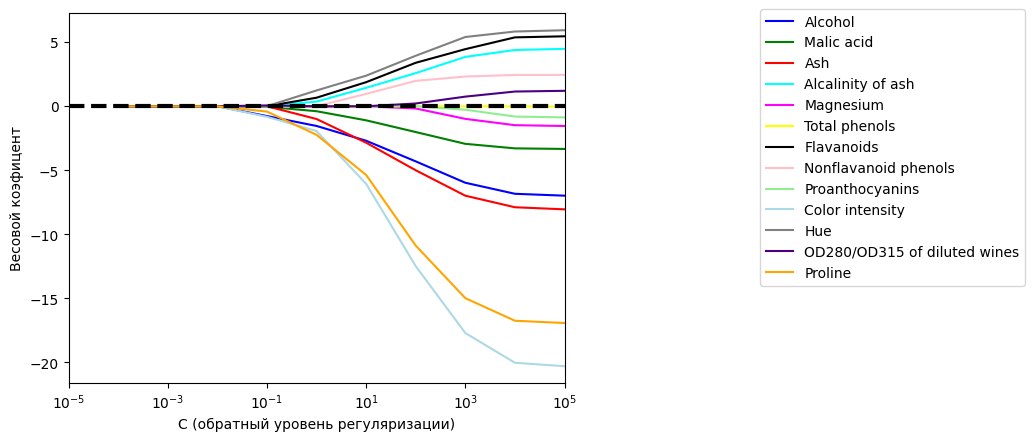

In [93]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = OneVsRestClassifier(LogisticRegression(penalty='l1',
                                                C=10.**c,
                                                solver='liblinear',
                                                random_state = 0))
    lr.fit(X_train_std, y_train)
    weights.append(lr.estimators_[1].coef_.flatten())
    params.append(10**c)
weights = np.array(weights)
for column, color, in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label = df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Весовой коэфицент')
plt.xlabel('C (обратный уровень регуляризации)')
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor = (1.38, 1.03),
           ncol = 1, fancybox = True)
plt.show()

График демонстрирует, **как изменяются весовые коэффициенты признаков при использовании L1-регуляризации** в зависимости от значения гиперпараметра $C$.

В модели, которая отличает образцы класса 1 от остальных, видно, что:

* Признаки **Hue**, **Flavanoids**, **Alkalinity of ash**, **Nonflavanoid phenols** и **OD280/OD315 of diluted wines** работают «за» класс 1: чем их значения выше, тем выше шанс отнести образец к этому классу.
* Признак **total phenols** никак не влияет на решение — его вес обнулён.
* **Proanthocyanins** и **Magnesium** слегка «отталкивают» класс 1, но эффект очень слабый.
* Все остальные характеристики заметно «отдаляют» образец от класса 1 — их веса отрицательны и по модулю достаточно велики.

При этом сила этого влияния зависит от параметра $C$:

* При **сильной регуляризации** (низкое значение $C$, например $C = 0.01$) практически все коэффициенты зануляются, и модель становится максимально простой и разреженной.
* По мере **увеличения $C$** (ослабления регуляризации) сначала «оживают» самые информативные признаки — их веса выходят из нуля, затем к ним подключаются менее значимые.
* В итоге, при большом $C$ важные признаки получают значительно большее влияние, а «противоположные» — более крупные отрицательные веса.

> Напоминание: $C = 1/\lambda$, где $\lambda$ — сила регуляризации. Чем меньше $C$, тем сильнее штраф и тем более разреженной оказывается модель.



* **L1-регуляризация** эффективно обнуляет коэффициенты при сильной настройке (малом $C$).
* **Путь регуляризации** показывает, **какие признаки "первыми входят в модель"**, а какие — остаются нулями при разных уровнях регуляризации.
* Этот график **полезен для отбора признаков** и понимания влияния регуляризации на модель.

---

## Последовательные алгоритмы отбора признаков

---

**Уменьшение размерности через отбор признаков**

* **Цель**: снизить сложность модели и избежать переобучения за счёт удаления нерелевантных или шумовых признаков.
* **Две категории методов**:

  * **Отбор признаков (feature selection)** – выбираем подмножество исходных признаков.
  * **Извлечение признаков (feature extraction)** – строим новые признаки на основе исходных.

---

### Последовательные алгоритмы отбора признаков

* Представляют собой **жадные методы поиска**, которые поэтапно сокращают размерность с $d$ до $k$ ($k < d$).
* **Преимущества**:

  * Ускоряют обучение и предсказание.
  * Уменьшают ошибку обобщения за счёт удаления нерелевантных признаков.
  * Полезны для моделей без встроенной регуляризации.

---

### Sequential Backward Selection (SBS) - последовательное пошаговое исключение

* **Идея**: начиная с полного набора признаков, последовательно удалять по одному наименее важному признаку до достижения требуемого числа признаков.
* **Жадный выбор**: на каждом шаге удаляется тот признак, чьё исключение **минимально ухудшает** качество модели.
* **Критериальная функция** $J$: измеряет изменение производительности модели (например, точность, AUC и т. п.) при удалении конкретного признака.

---

### Алгоритм SBS (4 шага)

1. **Инициализация**: $k = d$, исходный набор признаков $X_k$.
2. **Выбор признака**:

   $$
     x^- = \arg\max_{x \in X_k} J(X_k \setminus \{x\})
   $$

   (удаляем признак, при исключении которого модель теряет меньше всего).
3. **Удаление**:

   $$
     X_{k-1} = X_k \setminus \{x^-\},\quad k \leftarrow k - 1.
   $$
4. **Остановка**: если $k$ равно желаемому числу признаков, иначе — вернуться к шагу 2.

---

**Ключевые моменты**:

* **Жадность**: каждый шаг оптимален локально, но не гарантирует глобальный оптимум.
* **Эффективность**: позволяет получить компактный набор признаков без полного перебора.
* Может даже **улучшить** качество модели за счёт устранения шумовых признаков.


In [94]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [95]:
import numpy as np
from itertools import combinations
from sklearn.base import clone
from sklearn.model_selection import train_test_split

class SBS:
    """
    Алгоритм последовательного пошагового исключения (Sequential Backward Selection).

    Параметры
    ----------
    estimator : объект
        Модель из scikit-learn с методами fit и predict.
    k_features : int
        Желаемое количество признаков после отбора.
    scoring : callable
        Функция оценки качества (y_true, y_pred) -> score.
    test_size : float
        Доля данных для тестовой выборки.
    random_state : int
        Фиксирует генератор случайных чисел для reproducibility.
    """

    def __init__(self, estimator, k_features, scoring, test_size=0.25, random_state=1):
        # Клонируем переданный estimator, чтобы не изменять оригинал при обучении
        self.estimator = clone(estimator)
        # Целевое количество признаков после отбора
        self.k_features = k_features
        # Функция для оценки качества, например accuracy_score, f1_score и т.д.
        self.scoring = scoring
        # Доля наблюдений, отводимая под тестовую выборку
        self.test_size = test_size
        # Фиксированное состояние генератора случайных чисел для reproducibility
        self.random_state = random_state

    def fit(self, X, y):
        """
        Обучение алгоритма SBS: последовательное исключение признаков.

        Параметры
        ----------
        X : массив, форма [n_samples, n_features]
            Матрица признаков.
        y : массив, форма [n_samples]
            Вектор целевых меток.

        Возвращает
        ----------
        self : объект
            Обученный экземпляр класса.
        """
        # Разделяем данные на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )

        # Общее число признаков
        n_features = X_train.shape[1]
        # Изначальные индексы всех признаков (0, 1, ..., n_features-1)
        self.indices_ = tuple(range(n_features))
        # История подмножеств признаков
        self.subsets_ = [self.indices_]

        # Оценка качества модели со всеми признаками
        initial_score = self._calc_score(X_train, X_test, y_train, y_test, self.indices_)
        self.scores_ = [initial_score]

        # Итеративное удаление признаков до достижения k_features
        while len(self.indices_) > self.k_features:
            scores = []   # список метрик для каждого варианта удаления
            subsets = []  # соответствующие подмножества признаков

            # Проверяем все возможные варианты исключения одного признака
            for subset in combinations(self.indices_, r=len(self.indices_) - 1):
                score = self._calc_score(X_train, X_test, y_train, y_test, subset)
                scores.append(score)
                subsets.append(subset)

            # Выбираем подмножество с наилучшим (максимальным) значением метрики
            best_idx = np.argmax(scores)
            # Обновляем текущий набор признаков
            self.indices_ = subsets[best_idx]
            # Сохраняем историю
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best_idx])

        # Лучшая метрика при желаемом числе признаков
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        """
        Преобразование: удаление невыбранных признаков из X.

        Параметры
        ----------
        X : массив, форма [n_samples, n_features]
            Исходная матрица признаков.

        Возвращает
        ----------
        X_reduced : массив, форма [n_samples, k_features]
            Матрица с выбранными признаками.
        """
        # Возвращаем только выбранные столбцы в X
        return X[:, self.indices_]

    def fit_transform(self, X, y):
        """
        Сочетание fit и transform для удобства: обучаем и сразу возвращаем преобразованные X.
        """
        return self.fit(X, y).transform(X)

    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        """
        Вспомогательный метод для обучения модели на подмножестве признаков и оценки её качества.

        Параметры
        ----------
        X_train, X_test : массивы
            Обучающие и тестовые матрицы признаков.
        y_train, y_test : массивы
            Векторы целевых меток.
        indices : tuple
            Индексы признаков для использования.

        Возвращает
        ----------
        score : float
            Значение метрики self.scoring для прогнозов на тестовых данных.
        """
        # Обучаем клон модели на выбранных признаках
        self.estimator.fit(X_train[:, indices], y_train)
        # Делаем предсказание на тесте
        y_pred = self.estimator.predict(X_test[:, indices])
        # Возвращаем значение метрики
        return self.scoring(y_test, y_pred)


**Ключевые моменты реализации SBS-класса:**

* Параметр `k_features` задаёт желаемое число признаков в итоговом подмножестве.
* В качестве метрики по умолчанию используется `accuracy_score` для оценки производительности модели на подмножествах признкаов(внутренних тестовых данных).
* В методе `fit` в цикле `while` с помощью `itertools.combinations` перебираются все подмножества текущего размера, оцениваются их точности, и выбирается лучшее.
* После каждой итерации размер подмножества уменьшается на единицу, пока не достигнет `k_features`.
* Все промежуточные значения точности сохраняются в списке `self.scores_`.
* Окончательные индексы выбранных признаков сохраняются в `self.indices_`, что позволяет в методе `transform` вернуть данные, отобранные по этим столбцам.
* Вместо явного вычисления критерия для каждого возможного исключения признака алгоритм просто удаляет те, которые не входят в лучшее подмножество на каждом шаге.

---

**Проверка работы SBS с kNN**

* Используем `SBS` для поэтапного отбора признаков на основе точности kNN.
* В метод `fit` передаём только тренировочный набор `X_train`; внутри он дополнительно разделяет данные на обучающую и валидационную выборки.
* Валидационный набор служит для оценки качества подмножества признаков, а исходный тестовый набор остаётся «чистым» и не участвует в обучении.
* По завершении `fit` в `self.scores_` хранятся точности лучшего подмножества на каждом шаге, а `self.indices_` — индексы выбранных признаков.
* Затем строим график зависимости точности kNN на валидации от числа признаков.


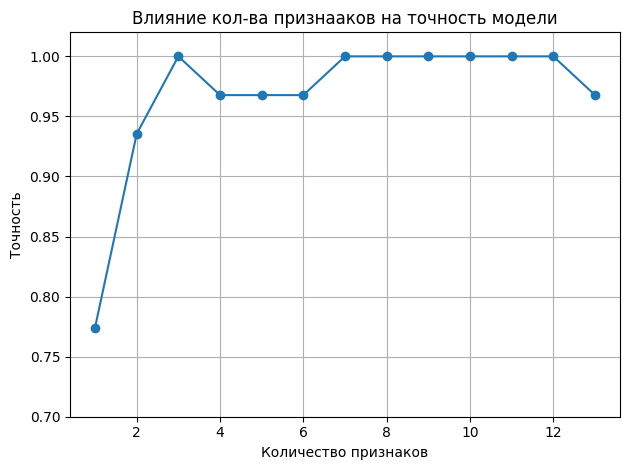

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1, scoring=accuracy_score)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Точность')
plt.xlabel('Количество признаков')
plt.title('Влияние кол-ва признааков на точность модели')
plt.grid()
plt.tight_layout()
plt.show()


In [97]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


> Как видно на графике, точность kNN-классификатора на валидационном наборе выросла после уменьшения числа признаков — эффект от снижения «проклятия размерности». При этом при $k = \{3,7,8,9,10,11,12\}$ модель достигает 100 % точности.
>
> Для $k=3$ мы также извлекли минимальный набор из трёх признаков: взяли индексы подмножества с 11-й позиции в `sbs.subsets_` и сопоставили их с именами столбцов исходного DataFrame.

In [98]:
# Оценка производительности kNN
knn.fit(X_train_std, y_train)
print('Точность при обучении: ', knn.score(X_train_std, y_train))
print('Точность при тестировании', knn.score(X_test_std, y_test))

Точность при обучении:  0.967741935483871
Точность при тестировании 0.9814814814814815


В приведенном примере мы использовали полный набор признаков и получили
точность примерно **97%** на обучающем наборе данных и примерно **98%** на тестовом
наборе, что свидетельствует о хорошей обобщающей способности нашей модели. 

Теперь используем выбранное подмножество из трех признаков и посмотрим,
насколько хорошо сработает kNN в этом случае.

In [99]:
knn.fit(X_train_std[:, k3], y_train)
print('Точность при обучении: ', 
      knn.score(X_train_std[:, k3], y_train))
print('Точность при тестировании: ', 
      knn.score(X_test_std[:, k3], y_test))

Точность при обучении:  0.9516129032258065
Точность при тестировании:  0.9259259259259259


Когда мы оставили менее четверти исходных признаков набора Wine, точность на тесте снизилась лишь слегка. Это говорит о том, что три оставшихся признака содержат почти всю необходимую классифицирующую информацию.

При этом стоит учитывать, что сам набор Wine невелик и чувствителен к случайности разбиения на обучающую и тестовую выборки.

Хотя уменьшение числа признаков не повысило точность kNN, оно привело к уменьшению объёма данных и упрощению модели, что особенно ценно при дорогом сборе признаков и для облегчённой интерпретации.

---

В scikit-learn доступны различные алгоритмы отбора признаков, включая несколько вариантов последовательного отбора, рекурсивное исключение признаков на основе весов, методы на основе деревьев по важности признаков и одномерные статистические тесты.

Эти методы позволяют автоматически выявлять наиболее информативные признаки, снижать размерность данных, упрощать модели и повышать их интерпретируемость.